## Lecture-7: Neural Networks Basics
## Under the supervision of Dr. Manish Shrivastava

# Topics covered so far

* Lecture - 1: Python basics includes list, tuple, dictionary, loops and functions
* Lecture - 2: Additional concepts in python, Introduction to Numpy, pandas, and matplotlib
* Lecture - 3: Regular expressions, stop words, lemmatization, stemming, Tokenization and
Challenges in tokenization
* Lecture - 4: Spelling mistake detection and correction with minimum edit distance, Chunking
and NER, POS tagging
* Lecture - 5: Language Modeling, Smoothing
* Lecture - 6: Word Representations

# Topics covered in this lecture

1. Introduction
    - Biological neuron
    - Artificial Neuron (perceptron model)
    - Explain terms in a perceptron
    - Purpose of bias and activation functions
    - Activation Units
    - Loss functions
    - Define forward and backward propagation
2. Training a single neuron model 
    - Linear regression

 ### 1.  Introduction

- Artificial Neural Networks are inspired from the biological activities of Humans and animals like monkeys, ants etc


- The core idea of Artificial Neural Networks is to mimic some part/functionality of human brain.

- The simplest Neural Network model called "Perceptron" was designed by Rosenblatt in 1957.

- It has wide range of applications in this modern deep learning era. some of them are

    - Voice Assistants (Apple Siri, Amazon Alexa, Cortana)
    - Natural Language Processing (Abstractive Summarization, Question Answering)
    - Self Driving Cars (Tesla, Google Waymo)
    - Machine Translation

###                                           Artificial Neuron vs Biological Neuron

<img src="bn.png" alt="Drawing" style="width: 500px;"/>

- In biological neurons, all the inputs/signals received at dendrites are collected at the cell body.
- Operations are performed on the net input collected at the cell body.
- The results are carried through axon to synapses

### Explain terms in perceptron

<img src="an.jpeg" alt="Drawing" style="width: 600px;"/>


- similar to biological neuron, in artificial neuron, 

    - the input values <b>{x1, · · · , xk}</b> are multiplied with their corresponding weigths <b>{w1, · · · , wk}</b>
    - the net input is passed through activation function <b>f</b>, where the opeartions are performed on the net input.
    - the resultant output of activation function is stored in <b>y</b>. 

        - <b>y = f(u)</b>

        - <b>u</b> is the net input of the neuron, defined as $u=\sum_{i=0}^K wi.xi \$

        - using vector notation, we can write, $u=w^T x$

 

### Role of Bias in Neural Networks

- It allows you to move the line down and up fitting the prediction with the data better. If the constant c is absent then the line will pass through the origin (0, 0) and you will get a poorer fit.

<img src="bias.png" alt="Drawing" style="width: 600px;"/>

### Activation Functions

- It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. Different activation functions result in distinct behaviors of the neuron

- The Activation Functions can be basically divided into 2 types-

    1. Linear Activation Functions
    2. Non-linear Activation Functions
    
<img src="linear-nonlinear.png" alt="Drawing" style="width: 500px;"/>

- Linear Activation Functions

    - Unit Step Function 
    \begin{equation}
    f(u) =
    \begin{cases}
      1 & \text{if u>0}\\
      0 & \text{otherwise}
    \end{cases}       
    \end{equation}

        - A neuron with this activation function is called a <b>perceptron</b>
        - Note that a perceptron is a linear classifier, it classifies given input as one of the classes belonging to [0,1]
        - If we want to fit more complex functions, we need to use a non-linear model.

<img src="linear.png" alt="Drawing" style="width: 600px;"/>

### Non-linear Activation Functions

- The Nonlinear Activation Functions are the most used activation functions. 
- It makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

<img src="nonlinear.png" alt="Drawing" style="width: 600px;"/>

- We have various kind of activation functions like sigmoid, tanh, reLu, leaky reLu, softmax..etc. Below mentioned few non-linear ativation functions

<img src="act_func.png" alt="Drawing" style="width: 600px;"/>

### Sigmoid activation function

<img src="sig2.jpg" alt="Drawing" style="width: 650px;"/>

- The advantage of using sigmoid activation function is it's derivative can also be written interms of sigmoid. so, it is easy to compute derivatives(using Back Propogation) while updating weights of the network.

- The output of sigmoid fucntion lies between 0 and 1 and derivatives of sigmoid function also lies between 0 and 1.

- The disadvantage with this function is the probelm of vanishing gradient that occurs when you build deep neural networks.

### Tanh activation function

<img src="tan2.jpg" alt="Drawing" style="width: 680px;"/>

- The advantage of using tanh activation function is it's derivative can also be written interms of tanh. so, it is easy to compute derivatives(using Back Propogation) while updating weights of the network.

- The output of tanh fucntion lies between -1 and 1 and derivatives of tanh function lies between 0 and 1.
- The disadvantage with this function is the probelm of vanishing gradient that occurs when you build deep neural networks.

### ReLu activation function


<img src="relu2.jpg" alt="Drawing" style="width: 680px;"/>

- The advantage of using ReLu activation function is, it overcomes the problem of vanishing gradient faced by sigmoid and tanh functions.

- This is the most popular activation unit in deep learning era.

- The disadvantage with this function is the probelm of dead activation that occurs when derivatives become 0.

- To overcome this problem slightly modified version of Relu called leaky Relu is used. but, in most of the cases Relu activation gives good results.



### Loss Functions

- The objective of the network is to minimze the loss functions (or objective functions) during the training.
- Let there are K output neurons. Let the true output/target be t and the prediction/output is o.

<img src="mse.png" alt="Drawing"/>
<img src="loss2.png" alt="Drawing"/>
<img src="loss3.png" alt="Drawing"/>

- In this slide, we explain how the Perceptron works with Logic gates (AND, OR, NOT, and so on).

<img src="xor.gif" alt="Drawing"/>
<img src="XOR_gate.png" alt="Drawing"/>

Text(0, 0.5, 'Cost')

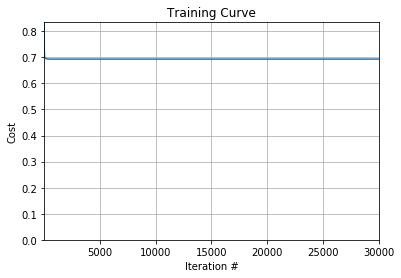

In [38]:
#logistic regression

import numpy as np
import theano
import theano.tensor as T
 
# Set inputs and correct output values
inputs = [[0,0], [1,1], [0,1], [1,0]]
outputs = [0, 0, 1, 1]
 
# Set training parameters
alpha = 0.1 # Learning rate
training_iterations = 30000
 
# Define tensors
x = T.matrix("x")
y = T.vector("y")
b = theano.shared(value=1.0, name='b')
 
# Set random seed
rng = np.random.RandomState(2345)
 
# Initialize random weights
w_values = np.asarray(rng.uniform(low=-1, high=1, size=(2, 1)),
                      dtype=theano.config.floatX) # Force type to 32bit float for GPU
w = theano.shared(value=w_values, name='w', borrow=True)
 
# Theano symbolic expressions
hypothesis = T.nnet.sigmoid(T.dot(x, w) + b) # Sigmoid/logistic activation
hypothesis = T.flatten(hypothesis) # This needs to be flattened so
                                   # hypothesis (matrix) and
                                   # y (vector) have the same shape
 
cost = T.nnet.binary_crossentropy(hypothesis, y).mean() # Binary CE
updates_rules = [
    (w, w - alpha * T.grad(cost, wrt=w)),
    (b, b - alpha * T.grad(cost, wrt=b))
]
 
# Theano compiled functions
train = theano.function(inputs=[x, y], outputs=[hypothesis, cost],
                        updates=updates_rules)
predict = theano.function(inputs=[x], outputs=[hypothesis])
 
# Training
cost_history = []
 
for i in range(training_iterations):
    h, cost = train(inputs, outputs)
    cost_history.append(cost)
    
# Plot training curve
plt.plot(range(1, len(cost_history)+1), cost_history)
plt.grid(True)
plt.xlim(1, len(cost_history))
plt.ylim(0, max(cost_history))
plt.title("Training Curve")
plt.xlabel("Iteration #")
plt.ylabel("Cost")

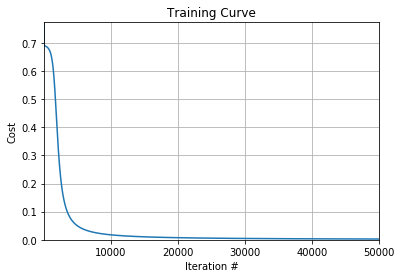

In [37]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

# Set inputs and correct output values
inputs = [[0,0], [1,1], [0,1], [1,0]]
outputs = [0, 0, 1, 1]

# Set training parameters
alpha = 0.1  # Learning rate
training_iterations = 50000
hidden_layer_nodes = 3

 # Define tensors
x = T.matrix("x")
y = T.vector("y")
b1 = theano.shared(value=1.0, name='b1')
b2 = theano.shared(value=1.0, name='b2')

# Set random seed
rng = np.random.RandomState(2345)

# Initialize weights
w1_array = np.asarray(
    rng.uniform(low=-1, high=1, size=(2, hidden_layer_nodes)),
    dtype=theano.config.floatX)  # Force type to 32bit float for GPU
w1 = theano.shared(value=w1_array, name='w1', borrow=True)

w2_array = np.asarray(
    rng.uniform(low=-1, high=1, size=(hidden_layer_nodes, 1)),
    dtype=theano.config.floatX)  # Force type to 32bit float for GPU
w2 = theano.shared(value=w2_array, name='w2', borrow=True)

# Theano symbolic expressions
a1 = T.nnet.sigmoid(T.dot(x, w1) + b1)  # Input -> Hidden
a2 = T.nnet.sigmoid(T.dot(a1, w2) + b2)  # Hidden -> Output
hypothesis = T.flatten(a2)  # This needs to be flattened so
                            # hypothesis (matrix) and
                            # y (vector) have the same shape

# cost = T.sum((y - hypothesis) ** 2)  # Quadratic/squared error loss
# cost = -(y*T.log(hypothesis) + (1-y)*T.log(1-hypothesis)).sum()  # Manual CE
# cost = T.nnet.categorical_crossentropy(hypothesis, y)  # Categorical CE
cost = T.nnet.binary_crossentropy(hypothesis, y).mean()  # Binary CE

updates_rules = [
    (w1, w1 - alpha * T.grad(cost, wrt=w1)),
    (w2, w2 - alpha * T.grad(cost, wrt=w2)),
    (b1, b1 - alpha * T.grad(cost, wrt=b1)),
    (b2, b2 - alpha * T.grad(cost, wrt=b2))
    ]

# Theano compiled functions
train = theano.function(inputs=[x, y], outputs=[hypothesis, cost],
                        updates=updates_rules)
predict = theano.function(inputs=[x], outputs=[hypothesis])

# Training
cost_history = []

for i in range(training_iterations):
    #if (i+1) % 5000 == 0:
        #print "Iteration #%s: " % str(i+1)
        #print "Cost: %s" % str(cost)
    h, cost = train(inputs, outputs)
    cost_history.append(cost)

# Plot training curve
plt.plot(range(1, len(cost_history)+1), cost_history)
plt.grid(True)
plt.xlim(1, len(cost_history))
plt.ylim(0, max(cost_history))
plt.title("Training Curve")
plt.xlabel("Iteration #")
plt.ylabel("Cost")

# Predictions
test_data = [[0,0], [1,1], [0,1], [1,0]]
predictions = predict(test_data)
#print predictions

### Forward propagation and back propagation in a neural network

- Using the input variables x and y, The forwardpass (left half of the figure) calculates output z as a function of x and y i.e. f(x,y)

- The right side of the figures shows the backwardpass.

- Receiving dL/dz (the derivative of the total loss with respect to the output z) , we can calculate the individual  gradients of x and y on the loss function by applying the chain rule, as shown in the figure.

<img src="forward_backward.jpeg" alt="Drawing" style="width: 500px; height: 200px"/>

# Training a single neuron model
### linear regression
- Trainig a neural network means finding right set of weights.
- Let us consider linear regression problem, which is a single neuron model.
    - given dataset D={xi,yi} 
    - xi is a point in d-dimensional space and there are 'n' such points in dataset
    - yi is a real valued number
    - objective is to predict yi given a data point xi
- Intialize the weights using random normal distribution
    
    


<img src="1.jpg" alt="Drawing" style="width: 500px; height: 400px"/>

- <b>step 1: Computing Loss Function</b>
<img src="2.jpg" alt="Drawing" style="width: 500px;"/>


- <b>step 2: Posing Optimization Problem</b>
<img src="3.jpg" alt="Drawing" style="width: 500px;"/>

- <b>step 3: Computing Gradient of loss function using chain rule</b>
<img src="4.jpg" alt="Drawing" style="width: 500px;"/>


<img src="6.jpg" alt="Drawing" style="width: 500px;"/>

- <b>step 3: Computing Gradient of loss function using chain rule</b>
<img src="4.jpg" alt="Drawing" style="width: 500px;"/>


- <b>step 4: updating weights</b>
<img src="5.jpg" alt="Drawing" style="width: 500px;"/>

- <b>repeat step 4 till we reach convergence</b>

# Topics will be covered in the next lecture

* Classifiers
    - Logistic Regression
    - Support Vector Machine
    - Multi Layer Perceptron